# Librerías

In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
# Librerias para redes neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Librerías de manipulación de datos
import pandas as pd
import os
import sys
import numpy as np

# Opciones de Pandas
pd.set_option('display.max_columns', None)

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display
import plotly.express as px

# Librerías para estadística y pruebas
import scipy.stats as stats
from scipy.stats import gaussian_kde, kstest, norm, shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Librerías de machine learning y preprocesamiento
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Librerías para métricas de modelos
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

# Librerías de machine learning y preprocesamiento
from sklearn.ensemble import IsolationForest, RandomForestRegressor, GradientBoostingRegressor # Add RandomForestRegressor and GradientBoostingRegressor here
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Librerías para métricas de modelos
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math
import xgboost as xgb # Import xgboost and alias it as xgb

# Conectar con Google Drive

In [4]:
#drive.flush_and_unmount() #Linea en caso de tener que desconectar el drive por algún tipo de falla

In [5]:
# conectar con Google Drive para acceder a archivos desde Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path="/content/drive/MyDrive/analitica 3/Finanzas" ### ruta del repositorio en drive
os.chdir(path) ### volver la carpeta del repositorio directorio de trabajo
sys.path.append(path) ### agregarla al path, poder leer archivos de funciones propios como paquetes

# Cargar bases de datos

Datos históricos

In [7]:
file_id="1N7yANxAJcnNhITm3HTyF6NJYqzgiu2lg"
datos_historicos = pd.read_csv(f'https://docs.google.com/uc?export=download&id={file_id}', sep = ',')
datos_historicos.head(10)

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NoPaidPerc
0,1,384,0.016560,37950,20,0,2,17355,9,28,Mortgage,Bachelor,Divorced,18,0.196566
1,2,516,0.138825,22909,46,5,8,7175,13,0,Rent,Bachelor,Married,9,0.264438
2,3,638,0.391149,126521,80,5,7,1910,6,25,Rent,Bachelor,Single,9,0.287568
3,4,363,0.463521,39543,54,9,0,19339,5,22,Own,High School,Widowed,3,0.181348
4,5,804,0.504824,38522,72,1,10,7928,18,19,Own,PhD,Married,5,0.343376
5,6,677,0.297906,90725,81,2,12,12544,18,16,Mortgage,Bachelor,Widowed,8,0.249080
6,7,762,0.956454,29165,58,3,7,19569,11,26,Own,High School,Divorced,8,0.275798
7,8,737,0.479047,34979,63,6,12,2904,8,15,Mortgage,High School,Widowed,20,0.156406
8,9,692,0.891324,32533,75,3,10,3748,1,7,Own,Masters,Widowed,26,0.208318
9,10,481,0.119303,166969,46,5,16,10173,7,14,Own,Bachelor,Married,15,0.287099


Datos nuevos créditos

In [8]:
file_id="1D8dgyQaDGsIdP29ZqbMihYcbU13Oqbg5"
datos_nuevos_creditos = pd.read_csv(f'https://docs.google.com/uc?export=download&id={file_id}', sep = ',')
datos_nuevos_creditos.head(10)

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NewLoanApplication
0,10001,737,0.479047,34979,63,6,12,2904,8,15,Mortgage,High School,Widowed,20,37752.0
1,10002,411,0.442930,56459,28,7,4,17639,11,4,Rent,High School,Widowed,21,52917.0
2,10003,732,0.532314,76570,26,5,8,17730,7,10,Rent,High School,Widowed,10,106380.0
3,10004,710,0.295541,86752,51,8,16,7166,16,18,Mortgage,Masters,Widowed,17,35830.0
4,10005,848,0.248378,102286,29,4,8,4688,16,1,Own,High School,Widowed,26,32816.0
5,10006,828,0.343173,72326,66,9,7,4809,13,27,Mortgage,High School,Divorced,9,57708.0
6,10007,433,0.688842,117902,43,8,0,17240,15,13,Mortgage,Masters,Divorced,3,103440.0
7,10008,624,0.007985,152049,34,5,7,12710,9,2,Rent,High School,Widowed,14,139810.0
8,10009,685,0.091246,110153,65,7,7,10950,4,28,Rent,Masters,Divorced,1,229950.0
9,10010,502,0.123041,156750,49,6,5,13097,3,7,Own,High School,Divorced,16,248843.0


# Análisis exploratorio y limpiezas de datos

## datos_historicos

In [9]:
def visual_check(df):

    print('Shape:\n',df.shape,'\n')

    print('Data Types:\n', df.dtypes,'\n\n')

    df_colum_duplicated=df.columns.duplicated()
    print("Columnas duplicadas:\n",df_colum_duplicated,'\n\n')

    df_fil_duplicated=df.duplicated()
    print("Filas duplicadas:\n",df_fil_duplicated,'\n\n')

    df_colum_faltantes=df.columns[df.isnull().any()]
    print("Datos faltantes por columnas:\n",df_colum_faltantes,'\n\n')

    display(df.describe().T)

visual_check(datos_historicos)

Shape:
 (10000, 15) 

Data Types:
 ID                                   int64
CreditScore                          int64
DebtRatio                          float64
Assets                               int64
Age                                  int64
NumberOfDependents                   int64
NumberOfOpenCreditLinesAndLoans      int64
MonthlyIncome                        int64
NumberOfTimesPastDue                 int64
EmploymentLength                     int64
HomeOwnership                       object
Education                           object
MaritalStatus                       object
YearsAtCurrentAddress                int64
NoPaidPerc                         float64
dtype: object 


Columnas duplicadas:
 [False False False False False False False False False False False False
 False False False] 


Filas duplicadas:
 0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 1000

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CreditScore,10000.0,577.648800,159.219702,300.000000,438.000000,581.000000,717.000000,849.000000
DebtRatio,10000.0,0.499706,0.287868,0.000035,0.252349,0.501707,0.744447,0.999834
Assets,10000.0,109870.326500,51950.508360,20008.000000,64306.500000,110635.500000,153852.250000,199984.000000
Age,10000.0,53.215400,20.650870,18.000000,35.750000,53.000000,71.000000,89.000000
NumberOfDependents,10000.0,4.503500,2.862028,0.000000,2.000000,5.000000,7.000000,9.000000
NumberOfOpenCreditLinesAndLoans,10000.0,9.452900,5.729211,0.000000,4.000000,9.000000,14.000000,19.000000
MonthlyIncome,10000.0,10446.551100,5449.335633,1001.000000,5719.000000,10427.000000,15123.250000,19997.000000
NumberOfTimesPastDue,10000.0,9.488900,5.766594,0.000000,4.000000,10.000000,14.000000,19.000000
EmploymentLength,10000.0,14.598800,8.634077,0.000000,7.000000,15.000000,22.000000,29.000000


In [10]:
numerical_columns = datos_historicos.select_dtypes(include=['number'])

for column in numerical_columns:
    unique_values = numerical_columns[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("\n")

Valores únicos en la columna 'ID':
[    1     2     3 ...  9998  9999 10000]


Valores únicos en la columna 'CreditScore':
[384 516 638 363 804 677 762 737 692 481 676 777 310 500 411 331 491 358
 741 732 445 315 514 322 505 710 751 482 438 653 566 401 434 379 410 693
 556 559 563 723 816 848 712 486 572 576 669 828 537 620 433 624 435 378
 508 548 711 606 809 465 647 526 679 617 349 498 650 715 685 502 519 304
 307 832 795 513 430 545 846 326 603 460 845 501 826 580 492 402 682 844
 628 769 449 380 428 552 403 665 743 395 422 819 329 756 474 701 336 820
 350 412 671 342 587 371 765 330 707 417 740 698 640 800 591 810 397 302
 649 366 367 429 784 415 687 454 561 761 815 494 662 652 377 599 396 493
 843 596 674 346 613 533 631 726 805 836 499 713 301 534 834 629 727 305
 750 459 615 361 567 789 749 328 392 427 703 689 531 452 755 398 753 473
 354 644 333 602 664 763 766 780 772 344 574 394 570 581 345 605 718 733
 316 807 321 658 532 619 642 447 660 375 406 488 700 565 529 317 673 748
 

In [11]:
from plotly.subplots import make_subplots

def num_vis(df):
    numeric_columns = df.select_dtypes(include='number').columns
    n_cols = 3
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_columns],shared_yaxes=True)
    for i, column in enumerate(numeric_columns):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)
    fig_hist.update_layout(height=300 * n_rows, width=1500, title_text="Histogramas variables numéricas")
    fig_hist.show()

num_vis(datos_historicos)

Datos atípicos

In [12]:
def visual_outliers(df):
    numeric_columns = df.select_dtypes(include='number').columns

    #boxplot
    traces=[]
    for column in numeric_columns:
        traces.append(go.Box(y=df[column],name=column))
    fig_box=go.Figure(traces)

    fig_box.update_layout(
    title='Boxplot para variables numéricas',
    xaxis_title='Variables',
    yaxis_title='Valores',
    xaxis=dict(tickangle=90),  # Rotar las etiquetas del eje x
    width=1000,
    height=700)

    #histogramas
    n_cols = 2
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_columns],shared_yaxes=True)
    for i, column in enumerate(numeric_columns):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)

        kde = gaussian_kde(df[column], bw_method='scott')
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        p = kde(x)
        hist_values, bin_edges = np.histogram(df[column], bins=30)
        kde_scaled = p * np.max(hist_values) / np.max(p)

        fig_hist.add_trace(go.Scatter(x=x, y=kde_scaled, mode='lines', name=f'KDE {column}', line=dict(color='red')), row=(i // n_cols) + 1, col=(i % n_cols) + 1)

    fig_hist.update_layout(height=500 * n_rows, width=1000, title_text="Histogramas variables numéricas con KDE")

    fig_hist.show()
    fig_box.show()
visual_outliers(datos_historicos)

In [13]:
# Seleccionar solo las columnas numéricas
numeric_cols = datos_historicos.select_dtypes(include=[np.number]).columns

# Crear un diccionario para almacenar la cantidad de atípicos
outliers_count = {}

# Identificar y contar atípicos usando IQR
for col in numeric_cols:
    # Eliminar valores faltantes para el cálculo
    col_data = datos_historicos[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    outliers = (datos_historicos[col] < lower_bound) | (datos_historicos[col] > upper_bound)
    outliers_count[col] = np.sum(outliers)

# Crear un DataFrame con las cantidades de atípicos
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Variable', 'Cantidad de Atípicos'])
print(outliers_df)

                           Variable  Cantidad de Atípicos
0                                ID                     0
1                       CreditScore                     0
2                         DebtRatio                     0
3                            Assets                     0
4                               Age                     0
5                NumberOfDependents                     0
6   NumberOfOpenCreditLinesAndLoans                     0
7                     MonthlyIncome                     0
8              NumberOfTimesPastDue                     0
9                  EmploymentLength                     0
10            YearsAtCurrentAddress                     0
11                       NoPaidPerc                   496


¿Qué hacemos con el NPP?

## datos_nuevos

In [14]:
def visual_check(df):

    print('Shape:\n',df.shape,'\n')

    print('Data Types:\n', df.dtypes,'\n\n')

    df_colum_duplicated=df.columns.duplicated()
    print("Columnas duplicadas:\n",df_colum_duplicated,'\n\n')

    df_fil_duplicated=df.duplicated()
    print("Filas duplicadas:\n",df_fil_duplicated,'\n\n')

    df_colum_faltantes=df.columns[df.isnull().any()]
    print("Datos faltantes por columnas:\n",df_colum_faltantes,'\n\n')

    display(df.describe().T)

visual_check(datos_nuevos_creditos)

Shape:
 (1058, 15) 

Data Types:
 ID                                   int64
CreditScore                          int64
DebtRatio                          float64
Assets                               int64
Age                                  int64
NumberOfDependents                   int64
NumberOfOpenCreditLinesAndLoans      int64
MonthlyIncome                        int64
NumberOfTimesPastDue                 int64
EmploymentLength                     int64
HomeOwnership                       object
Education                           object
MaritalStatus                       object
YearsAtCurrentAddress                int64
NewLoanApplication                 float64
dtype: object 


Columnas duplicadas:
 [False False False False False False False False False False False False
 False False False] 


Filas duplicadas:
 0       False
1       False
2       False
3       False
4       False
        ...  
1053    False
1054    False
1055    False
1056    False
1057    False
Length: 1058,

,count,mean,std,min,25%,50%,75%,max
ID,1058.0,10529.500000,305.562596,10001.000000,10265.250000,10529.50000,10793.750000,11058.000000
CreditScore,1058.0,609.907372,155.560059,300.000000,481.250000,625.00000,746.000000,849.000000
DebtRatio,1058.0,0.339452,0.258188,0.000135,0.120664,0.29328,0.513582,0.998425
Assets,1058.0,114357.777883,51443.235663,20082.000000,69042.500000,117670.00000,157670.250000,199961.000000
Age,1058.0,48.307183,20.253950,18.000000,31.000000,46.00000,64.000000,89.000000
NumberOfDependents,1058.0,5.564272,2.695897,0.000000,4.000000,6.00000,8.000000,9.000000
NumberOfOpenCreditLinesAndLoans,1058.0,8.231569,5.668071,0.000000,3.000000,8.00000,13.000000,19.000000
MonthlyIncome,1058.0,10894.775047,5431.696814,1002.000000,6264.750000,11006.00000,15582.250000,19996.000000
NumberOfTimesPastDue,1058.0,7.982042,5.489532,0.000000,3.000000,7.00000,12.000000,19.000000
EmploymentLength,1058.0,11.095463,8.265770,0.000000,4.000000,10.00000,17.750000,29.000000


In [15]:
numerical_columns1 = datos_nuevos_creditos.select_dtypes(include=['number'])

for column in numerical_columns:
    unique_values = numerical_columns[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print("\n")

Valores únicos en la columna 'ID':
[    1     2     3 ...  9998  9999 10000]


Valores únicos en la columna 'CreditScore':
[384 516 638 363 804 677 762 737 692 481 676 777 310 500 411 331 491 358
 741 732 445 315 514 322 505 710 751 482 438 653 566 401 434 379 410 693
 556 559 563 723 816 848 712 486 572 576 669 828 537 620 433 624 435 378
 508 548 711 606 809 465 647 526 679 617 349 498 650 715 685 502 519 304
 307 832 795 513 430 545 846 326 603 460 845 501 826 580 492 402 682 844
 628 769 449 380 428 552 403 665 743 395 422 819 329 756 474 701 336 820
 350 412 671 342 587 371 765 330 707 417 740 698 640 800 591 810 397 302
 649 366 367 429 784 415 687 454 561 761 815 494 662 652 377 599 396 493
 843 596 674 346 613 533 631 726 805 836 499 713 301 534 834 629 727 305
 750 459 615 361 567 789 749 328 392 427 703 689 531 452 755 398 753 473
 354 644 333 602 664 763 766 780 772 344 574 394 570 581 345 605 718 733
 316 807 321 658 532 619 642 447 660 375 406 488 700 565 529 317 673 748
 

In [16]:
from plotly.subplots import make_subplots

def num_vis(df):
    numeric_columns = df.select_dtypes(include='number').columns
    n_cols = 3
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_columns],shared_yaxes=True)
    for i, column in enumerate(numeric_columns):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)
    fig_hist.update_layout(height=300 * n_rows, width=1500, title_text="Histogramas variables numéricas")
    fig_hist.show()

num_vis(datos_nuevos_creditos)

Datos atípicos

In [17]:
def visual_outliers(df):
    numeric_columns = df.select_dtypes(include='number').columns

    #boxplot
    traces=[]
    for column in numeric_columns:
        traces.append(go.Box(y=df[column],name=column))
    fig_box=go.Figure(traces)

    fig_box.update_layout(
    title='Boxplot para variables numéricas',
    xaxis_title='Variables',
    yaxis_title='Valores',
    xaxis=dict(tickangle=90),  # Rotar las etiquetas del eje x
    width=1000,
    height=700)

    #histogramas
    n_cols = 2
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols
    fig_hist = make_subplots(n_rows, n_cols, subplot_titles=[f'Histograma {column}' for column in numeric_columns],shared_yaxes=True)
    for i, column in enumerate(numeric_columns):
        hist=go.Histogram(x=df[column], name=f'Histograma {column}',nbinsx=30,opacity=0.75,marker=dict(color='blue',line=dict(color='black',width=1)))
        fig_hist.add_trace(hist,row=(i//n_cols)+1, col=(i % n_cols)+1)

        kde = gaussian_kde(df[column], bw_method='scott')
        x = np.linspace(df[column].min(), df[column].max(), 1000)
        p = kde(x)
        hist_values, bin_edges = np.histogram(df[column], bins=30)
        kde_scaled = p * np.max(hist_values) / np.max(p)

        fig_hist.add_trace(go.Scatter(x=x, y=kde_scaled, mode='lines', name=f'KDE {column}', line=dict(color='red')), row=(i // n_cols) + 1, col=(i % n_cols) + 1)

    fig_hist.update_layout(height=500 * n_rows, width=1000, title_text="Histogramas variables numéricas con KDE")

    fig_hist.show()
    fig_box.show()
visual_outliers(datos_nuevos_creditos)

In [18]:
# Seleccionar solo las columnas numéricas
numeric_cols = datos_nuevos_creditos.select_dtypes(include=[np.number]).columns

# Crear un diccionario para almacenar la cantidad de atípicos
outliers_count = {}

# Identificar y contar atípicos usando IQR
for col in numeric_cols:
    # Eliminar valores faltantes para el cálculo
    col_data = datos_nuevos_creditos[col].dropna()

    # Calcular IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites inferior y superior
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    outliers = (datos_nuevos_creditos[col] < lower_bound) | (datos_nuevos_creditos[col] > upper_bound)
    outliers_count[col] = np.sum(outliers)

# Crear un DataFrame con las cantidades de atípicos
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Variable', 'Cantidad de Atípicos'])
print(outliers_df)

                           Variable  Cantidad de Atípicos
0                                ID                     0
1                       CreditScore                     0
2                         DebtRatio                     0
3                            Assets                     0
4                               Age                     0
5                NumberOfDependents                     0
6   NumberOfOpenCreditLinesAndLoans                     0
7                     MonthlyIncome                     0
8              NumberOfTimesPastDue                     0
9                  EmploymentLength                     0
10            YearsAtCurrentAddress                     0
11               NewLoanApplication                     0


¿Qué hacemos con el NLA?

# Modelos

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
# Separar variables predictoras y objetivo
X = datos_historicos.drop(['NoPaidPerc','ID'], axis=1)
y = datos_historicos['NoPaidPerc']
X_nuevos = datos_nuevos_creditos.drop(columns=['ID'])

# Dummizar variables categóricas
X_dummies = pd.get_dummies(X, drop_first=True)

X_nuevos_dummies = pd.get_dummies(X_nuevos, drop_first=True)

X_nuevos_dum = X_nuevos_dummies.reindex(columns=X_dummies.columns, fill_value=0)

# Escalar variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummies)
X_nuevos_scaled = scaler.transform(X_nuevos_dum)

# Selección de variables
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X_scaled, y)
X_nuevos_selected = X_nuevos_scaled[:, selector.get_support()]

# Obtener nombres de columnas seleccionadas
columnas_seleccionadas = X_dummies.columns[selector.get_support()]
columnas_seleccionadas

Index(['CreditScore', 'DebtRatio', 'Assets', 'Age', 'NumberOfDependents',
       'NumberOfOpenCreditLinesAndLoans', 'MonthlyIncome',
       'NumberOfTimesPastDue', 'EmploymentLength', 'YearsAtCurrentAddress',
       'HomeOwnership_Own', 'HomeOwnership_Rent', 'Education_High School',
       'Education_Masters', 'Education_PhD', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widowed'],
      dtype='object')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [22]:
# Definición de hiperparámetros iniciales
dor = 0.3
sr = 0.1
l2 = keras.regularizers.l2(sr)

# Definición de la ANN Base
ann_base = keras.models.Sequential(
    [   # Capa de entrada
        keras.Input(shape=(X_selected.shape[1],)),
        # Capas ocultas
        keras.layers.Dense(128, activation="relu", kernel_regularizer=l2),
        keras.layers.Dense(64, activation="tanh"),
        keras.layers.Dropout(dor),
        keras.layers.Dense(16, activation="relu"),
        # Capa de salida
        keras.layers.Dense(1, activation="relu")
    ]
)

metrica = keras.metrics.RootMeanSquaredError(name='rmse')

ann_base.compile(
    optimizer="adam",
    loss=keras.losses.MeanSquaredError(),
    metrics=[metrica]
)

ann_base.summary()

history = ann_base.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,745 (45.88 KB)

 Trainable params: 11,745 (45.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 1.5208 - rmse: 0.1164 - val_loss: 0.0272 - val_rmse: 0.0442
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0121 - rmse: 0.0441 - val_loss: 0.0021 - val_rmse: 0.0410
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0023 - rmse: 0.0426 - val_loss: 0.0020 - val_rmse: 0.0392
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0020 - rmse: 0.0403 - val_loss: 0.0022 - val_rmse: 0.0421
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0021 - rmse: 0.0403 - val_loss: 0.0020 - val_rmse: 0.0384
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0021 - rmse: 0.0402 - val_loss: 0.0021 - val_rmse: 0.0409
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0020 - rmse: 0.0394 - val_loss: 0.0019 - val_rmse: 0.0387
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0020 - rmse: 0.0398 - val_loss: 0.0020 - val_rmse: 0.0404
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━

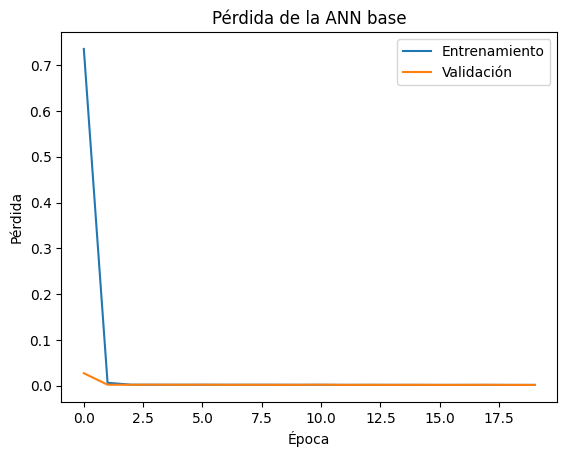

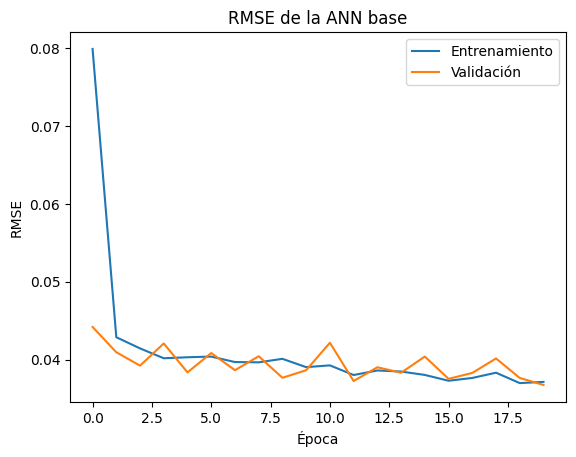

In [23]:
# Visualización de las curvas de error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida de la ANN base')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

# Visulización de las curvas de la métrica: MAPE
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('RMSE de la ANN base')
plt.ylabel('RMSE')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show()

In [33]:
# Definición de hiperparámetros
hp = kt.HyperParameters()
lo = keras.losses.MeanSquaredError()
m2 = keras.metrics.RootMeanSquaredError(name='val_rmse')

In [34]:
def tuner_model(hp):
  #Hiperparametros
  hp_num_layer = hp.Int('num_layers', 2, 5)
  hp_dropout = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
  hp_learning_rate = hp.Choice('learning_rate', values=[0.1, 0.01, 0.001])

  model = keras.Sequential()

  for i in range(hp_num_layer):
    model.add(layers.Dense(units= hp.Int('units_' + str(i),
                                         min_value=32,
                                         max_value=512,
                                         step=32),
                           activation='relu'))

  model.add(layers.Dense(32, activation="tanh"))
  model.add(layers.Dropout(hp_dropout))
  model.add(layers.Dense(1, activation='relu'))

  model.compile(
      optimizer = keras.optimizers.Adam(hp_learning_rate),
      loss = lo,
      metrics = [m2]
  )

  return model


In [35]:
search_model = kt.RandomSearch(
    hypermodel = tuner_model,
    hyperparameters = hp,
    objective = kt.Objective('val_rmse', direction='min'),
    max_trials = 10,
    directory = 'results_tuner',
    project_name = 'credit_risk_prediction'
)

Reloading Tuner from results_tuner/credit_risk_prediction/tuner0.json


In [36]:
# Ejecución de la búsqueda aleatoria
search_model.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 46s]
val_rmse: 0.2352488487958908

Best val_rmse So Far: 0.01558342482894659
Total elapsed time: 00h 10m 03s


In [28]:
search_model.results_summary()

Results summary
Results in results_tuner/california_housing
Showing 10 best trials
Objective(name="mape_prueba", direction="min")

Trial 01 summary
Hyperparameters:
num_layers: 3
dropout_rate: 0.5
learning_rate: 0.01
units_0: 256
units_1: 416
units_2: 416
units_3: 32
units_4: 512
Score: 95.01249694824219

Trial 02 summary
Hyperparameters:
num_layers: 2
dropout_rate: 0.1
learning_rate: 0.1
units_0: 128
units_1: 160
units_2: 192
units_3: 384
units_4: 64
Score: 95.01249694824219

Trial 06 summary
Hyperparameters:
num_layers: 3
dropout_rate: 0.4
learning_rate: 0.01
units_0: 352
units_1: 512
units_2: 448
units_3: 416
units_4: 96
Score: 95.01249694824219

Trial 08 summary
Hyperparameters:
num_layers: 2
dropout_rate: 0.2
learning_rate: 0.01
units_0: 480
units_1: 224
units_2: 352
units_3: 32
units_4: 64
Score: 95.01249694824219

Trial 05 summary
Hyperparameters:
num_layers: 5
dropout_rate: 0.2
learning_rate: 0.01
units_0: 64
units_1: 512
units_2: 64
units_3: 224
units_4: 480
Score: 95.01249694

In [37]:
# Mejor ANN
best_ANN = search_model.get_best_models()[0]
best_hp = search_model.get_best_hyperparameters()[0]
best_hp.values

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 



{'num_layers': 2,
 'dropout_rate': 0.2,
 'learning_rate': 0.001,
 'units_0': 224,
 'units_1': 416,
 'units_2': 160,
 'units_3': 480,
 'units_4': 192}

In [38]:
# Evaluación de la mejor ANN con x_test
best_ANN.evaluate(X_test, y_test)
preds = best_ANN.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9056e-04 - val_rmse: 0.1965
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
predicciones = best_ANN.predict(X_nuevos_selected)
X_nuevos['Prediccion_NoPaidPerc'] = predicciones
X_nuevos['Prediccion_NoPaidPerc'] = X_nuevos['Prediccion_NoPaidPerc']
X_nuevos

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NewLoanApplication,Prediccion_NoPaidPerc
0,737,0.479047,34979,63,6,12,2904,8,15,Mortgage,High School,Widowed,20,37752.0,0.129479
1,411,0.442930,56459,28,7,4,17639,11,4,Rent,High School,Widowed,21,52917.0,0.016829
2,732,0.532314,76570,26,5,8,17730,7,10,Rent,High School,Widowed,10,106380.0,0.000000
3,710,0.295541,86752,51,8,16,7166,16,18,Mortgage,Masters,Widowed,17,35830.0,0.166086
4,848,0.248378,102286,29,4,8,4688,16,1,Own,High School,Widowed,26,32816.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,603,0.257370,179888,37,0,17,19788,8,1,Mortgage,High School,Widowed,23,356184.0,0.186981
1054,710,0.690966,178287,48,6,8,13469,3,14,Rent,Bachelor,Widowed,14,282849.0,0.186608
1055,642,0.099068,195318,45,5,19,15991,0,6,Own,PhD,Single,22,319820.0,0.172287
1056,790,0.164651,109782,59,8,17,9726,7,17,Own,High School,Widowed,28,116712.0,0.000000


# División en quintiles

In [ ]:
datos_historicos['Quintil'] = pd.qcut(datos_historicos['NoPaidPerc'], q=5, labels=[0, 1, 2, 3, 4])
datos_historicos

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NoPaidPerc,Quintil
0,1,384,0.016560,37950,20,0,2,17355,9,28,Mortgage,Bachelor,Divorced,18,0.196566,1
1,2,516,0.138825,22909,46,5,8,7175,13,0,Rent,Bachelor,Married,9,0.264438,3
2,3,638,0.391149,126521,80,5,7,1910,6,25,Rent,Bachelor,Single,9,0.287568,4
3,4,363,0.463521,39543,54,9,0,19339,5,22,Own,High School,Widowed,3,0.181348,0
4,5,804,0.504824,38522,72,1,10,7928,18,19,Own,PhD,Married,5,0.343376,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,448,0.602547,57758,22,9,19,17797,19,5,Rent,Bachelor,Widowed,2,0.190319,0
9996,9997,643,0.633910,67051,85,3,1,7034,4,0,Rent,High School,Married,1,0.168900,0
9997,9998,695,0.019713,65309,42,4,3,9105,18,4,Rent,Bachelor,Divorced,6,0.237987,2
9998,9999,387,0.174242,115144,20,3,10,19388,0,11,Mortgage,PhD,Divorced,5,0.180394,0
